<a href="https://colab.research.google.com/github/jiztastamablastamarang/TwitterSturm/blob/main/TwitterUser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##WebDriver##

###Modules###

In [2]:
!dpkg --configure -a -qq
!pip install -q selenium
!apt-get -qq update
!apt install -q chromium-chromedriver

     |████████████████████████████████| 968 kB 4.2 MB/s 
     |████████████████████████████████| 359 kB 10.3 MB/s 
     |████████████████████████████████| 138 kB 57.4 MB/s 
     |████████████████████████████████| 3.6 MB 44.8 MB/s 
     |████████████████████████████████| 55 kB 2.9 MB/s 
     |████████████████████████████████| 58 kB 5.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.8 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  chromium-browser chromium-browser-l10n chromium-codecs-ffmpeg-extra
Suggested packages:
  webaccounts-chromium-extension unity-chromium-

In [3]:
import pandas as pd
import requests
import os
import glob
import random
import shutil
import time

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import ActionChains
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [4]:
def screenshot(driver):
  t=3
  time.sleep(t)
  driver.fullscreen_window()
  img = driver.get_screenshot_as_png()
  from IPython.display import Image
  return Image(img)

###TwitterSoldier Class###

In [14]:
class TwitterSoldier:

    def __init__(self, email, password, nick):
      self.email = EMAIL
      self.password = PASSWORD
      self.nick = NICK
      t = 10
      options = Options()
      options = webdriver.ChromeOptions()
      options.add_argument("--start-maximized")
      options.add_argument('--headless')
      options.add_argument('--no-sandbox')
      options.add_argument('--disable-dev-shm-usage')
      options.add_argument("--window-size=3920,2080")
      self.driver = webdriver.Chrome(executable_path="chromedriver", options=options)
      self.waiter = WebDriverWait(self.driver, t)
      self.action = ActionChains(self.driver)

    def login(self):
      driver = self.driver
      wait = self.waiter
      driver.get("https://twitter.com/login")
      time.sleep(3)

      def input(text):
        input = wait.until(EC.presence_of_element_located((By.TAG_NAME, "input")))
        input.send_keys(text)
        input.send_keys(Keys.ENTER)

      input(self.email)
      input(self.password)
      try:
        input(self.nick)
      except:
        pass
      time.sleep(3)
      return screenshot(driver)

    def reply_last_tweet(self, user, status, image):
      driver = self.driver
      wait = self.waiter
      action = self.action 
      driver.get(f"https://twitter.com/{user}")

      # find user tweets
      for i in range(5):
        action.send_keys(Keys.PAGE_DOWN)
        time.sleep(2)
      urls = []
      tweets = driver.find_elements(by=By.TAG_NAME, value="a")
      for tweet in tweets:
          url = tweet.get_attribute("href")
          if url.lower().count(f"{user.lower()}/status") and not url.count("photo"):
            urls.append(url)

      # get last tweet  
      try:
        url = urls[0]
        driver.get(url)
        reply = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@data-contents='true']")))
        reply.send_keys(status)
        media = driver.find_element(By.XPATH, "//input[@data-testid='fileInput']")
        media.send_keys(image)
        button = wait.until(EC.element_to_be_clickable((By.XPATH, "//div[@data-testid='tweetButtonInline']")))
        button.click()
        print(url)
      except:
        print(f"error sending reply: {user}")
        # return screenshot(driver)

##Docs##
Гуглотаблиці списком користувачей, контентом, директорія з фото

In [7]:
USERS = "https://docs.google.com/spreadsheets/d/1uUF6WGtFl-WBPe_oLdk4gdgFp09aPOAekBWmHdIUnC0/edit#gid=0" #повний список сенаторів
# USERS = "https://docs.google.com/spreadsheets/d/1UgpJjBFaGD89dYYsxJLJQn1GNyd9Fo6Rg1df4XSNnuQ/edit#gid=0"
CONTENT = "https://docs.google.com/spreadsheets/d/1dsdTocyIgQpJYrBLnjxBl9e3Bdw65vAWmpBPorzLlrI/edit#gid=0"# коменти
IMGS = "https://drive.google.com/drive/folders/13KrHYesxtF-Ut21EZe1ScOku8-wm-5JY" # директорія з фото

In [8]:
def load_doc(url):
  return pd.read_csv(url.replace("/edit#gid=", "/export?format=csv&gid="), on_bad_lines="skip")

###Images###
Фото додаються з розшареної директорії до власного гуглодиску. Буде запрошений код підтрвердження

In [9]:
folder_id = IMGS.split("/")[-1]
images = []

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

path = "./temp"
try: shutil.rmtree(path)
except: pass

try: os.makedirs(path)
except: pass

file_list = drive.ListFile(
    {'q': "'{}' in parents".format(folder_id)}).GetList()

for image in file_list:
    fname = os.path.join(path, image["title"])
    new_file = drive.CreateFile({"id": image["id"]})
    new_file.GetContentFile(fname)
    print("uploading: " + image["title"])
    images.append(os.path.join("/content", "temp", image["title"] ))

uploading: 274791836_1368383970268989_7318621539946358037_n.png
uploading: WhatsApp Image 2022-03-04 at 13.38.41.jpeg


###Users###

In [10]:
users = load_doc(USERS)
try:
  users["TwitterNickname"] = users["Twitter"].str.replace("https://twitter.com/", "", regex=False).str.replace("@", "", regex=False)
except:
  pass
users.dropna(subset=["TwitterNickname"], inplace=True)
users

,State,Member of Congress,Name,Party,Twitter,Facebook,TwitterNickname
0,Alabama,U.S. Senator,"Shelby, Richard",R,@SenShelby,x,SenShelby
1,Alabama,U.S. Senator,"Tuberville, Tommy",R,@Ttuberville,x,Ttuberville
2,Alabama 1st District,U.S. Representative,"Carl, Jerry",R,@RepJerryCarl,x,RepJerryCarl
3,Alabama 2nd District,U.S. Representative,"Moore, Barry",R,@RepBarryMoore,x,RepBarryMoore
4,Alabama 3rd District,U.S. Representative,"Rogers, Mike",R,@RepMikeRogers,x,RepMikeRogers
...,...,...,...,...,...,...,...
536,Wisconsin 7th District,U.S. Representative,"Tiffany, Thomas",R,@TomTiffanyWI,x,TomTiffanyWI
537,Wisconsin 8th District,U.S. Representative,"Gallagher, Mike",R,@MikeforWI,x,MikeforWI
538,Wyoming,U.S. Senator,"Lummis, Cynthia",R,@SenLummis,x,SenLummis
539,Wyoming,U.S. Senator,"Barrasso, John",R,@SenJohnBarrasso,x,SenJohnBarrasso


###Content###

In [11]:
content = load_doc(CONTENT)
content

,Messedge,Lengh
0,Russia has already launched hundreds missiles ...,159


##Credentials##

In [12]:
EMAIL = "+380631712817"
NICK = "LGustoj"
PASSWORD = "6pnpd7pg"

##Main##

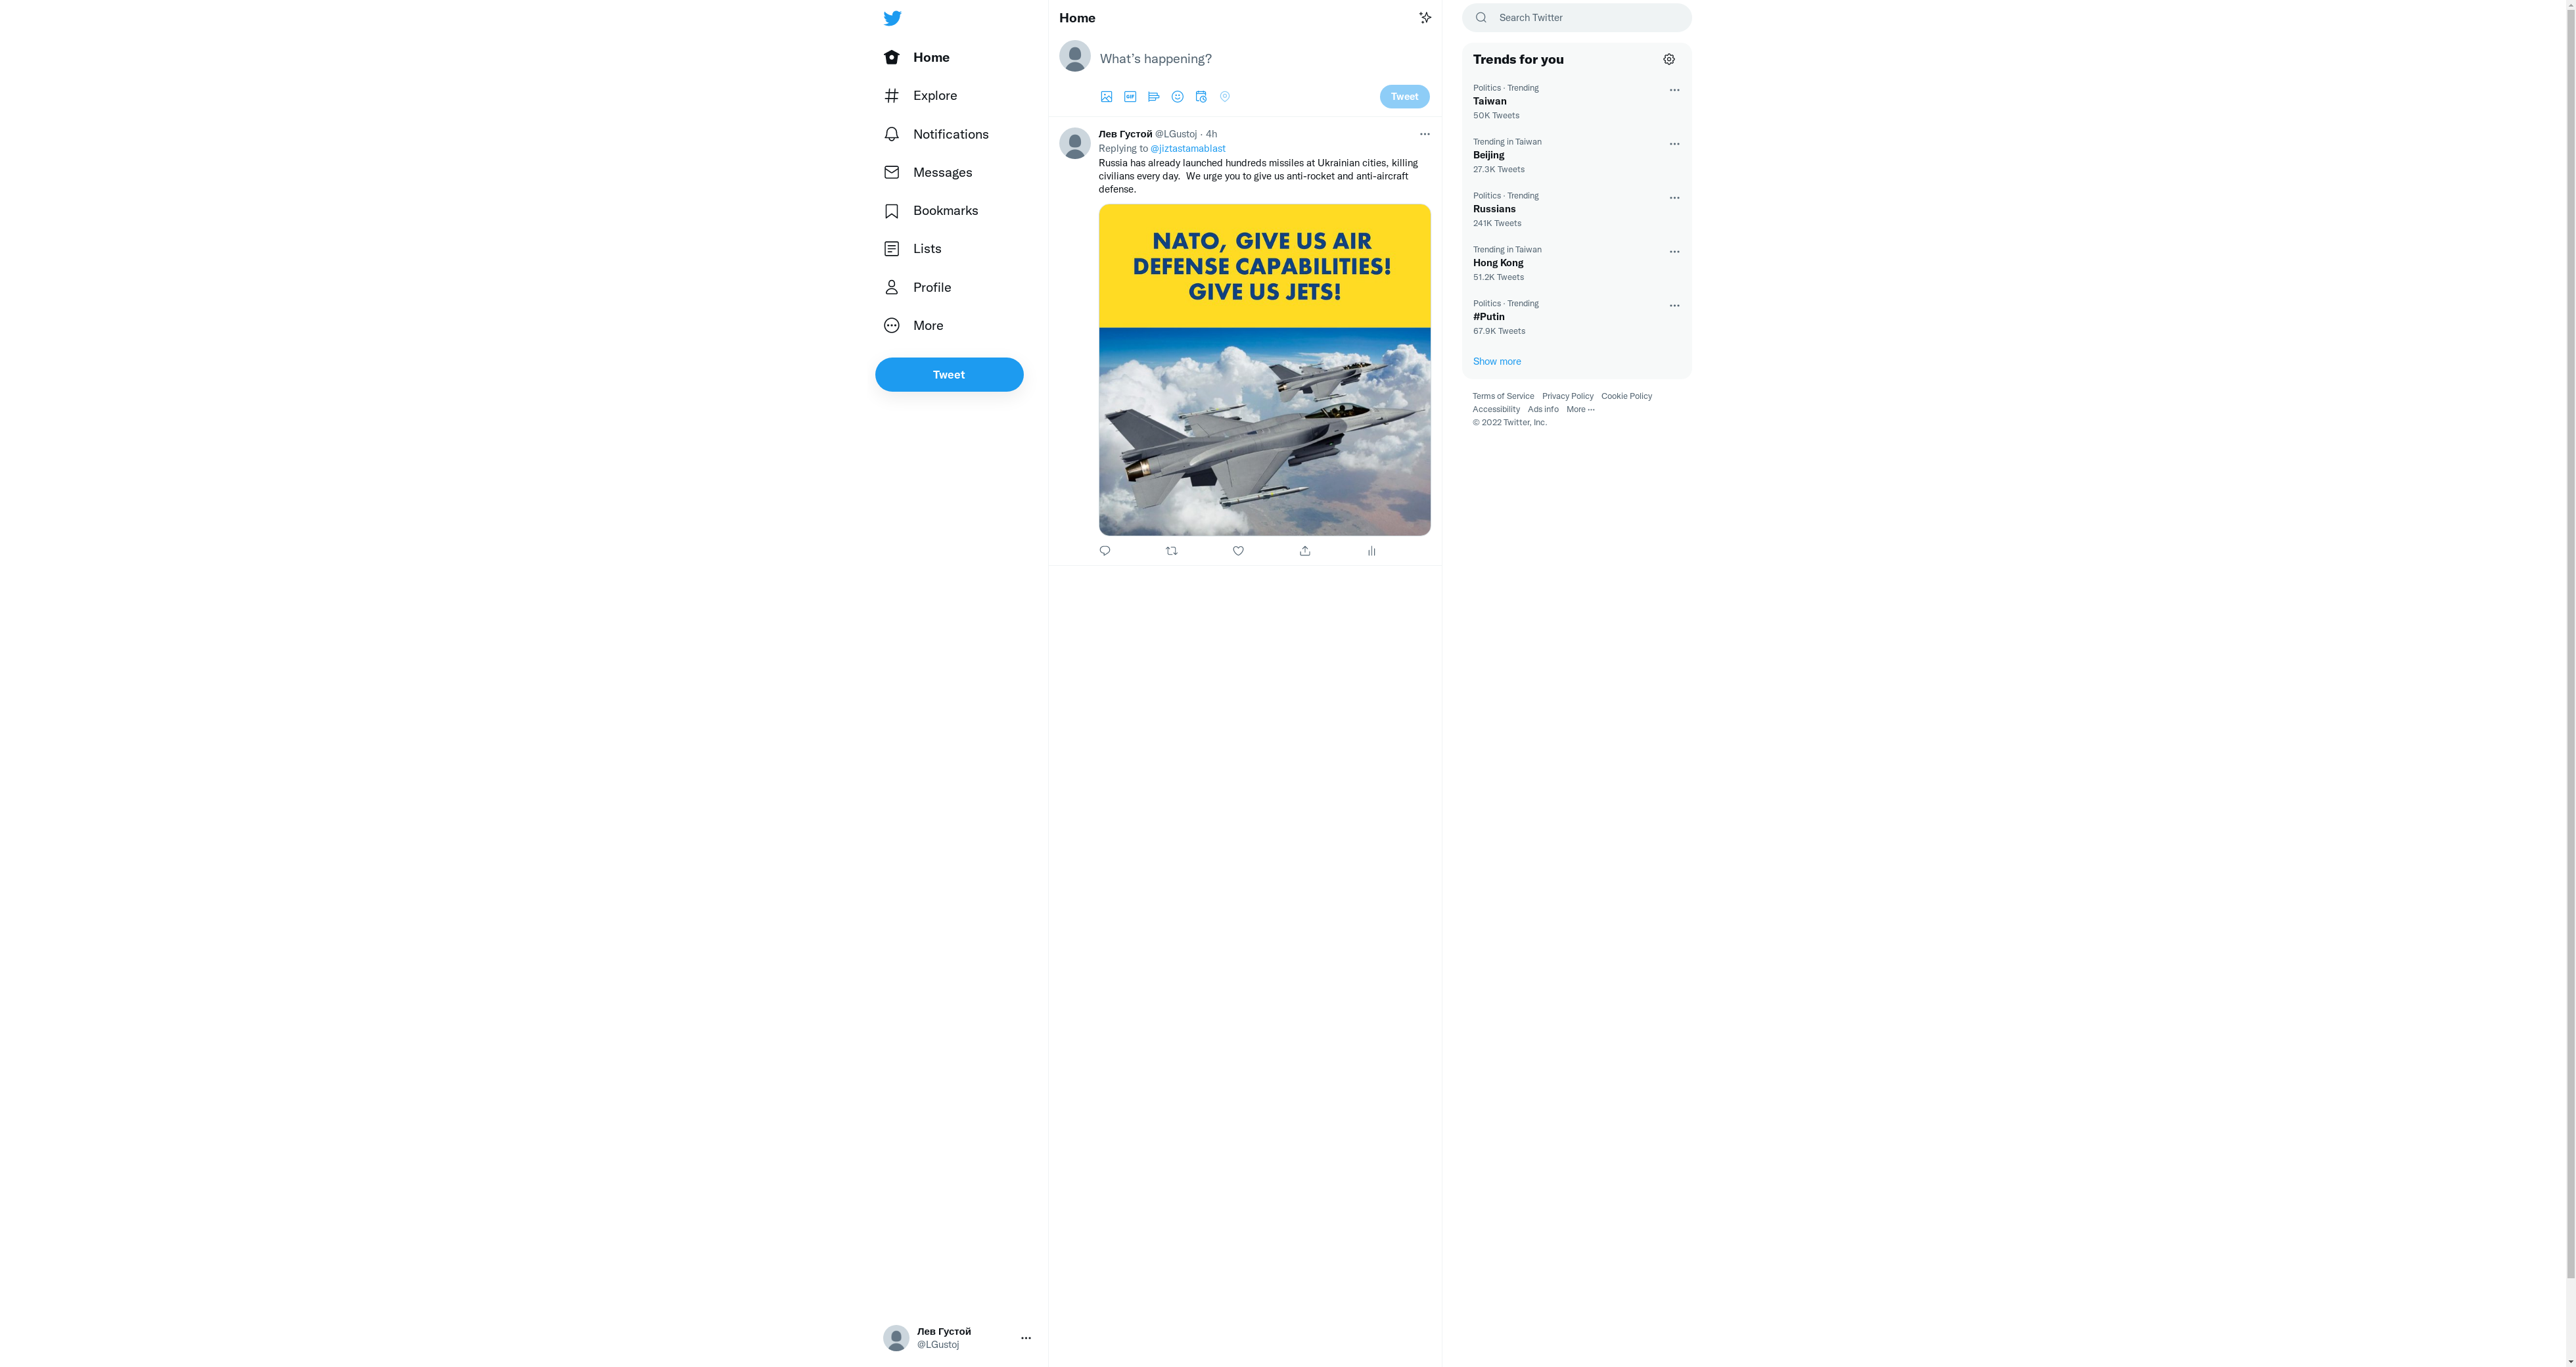

In [15]:
bot = TwitterSoldier(EMAIL, PASSWORD, NICK)
bot.login()

In [16]:
bad_user = []

for user in users["TwitterNickname"].to_list()[-40:-30]:
  status= random.choice(content["Messedge"].to_list())
  media = random.choice(images)
  bot.reply_last_tweet(user, status, media)

https://twitter.com/BobbyScott/status/1484167847093968898
https://twitter.com/Donald_McEachin/status/1503584549279866882
https://twitter.com/GoodForCongress/status/1498851279820316673
https://twitter.com/RepBenCline/status/1503413465272172555
https://twitter.com/RepSpanberger/status/1483786322032488448
https://twitter.com/RepDonBeyer/status/1503129205013417993
https://twitter.com/RepMGriffith/status/1503110546924707846
https://twitter.com/RepWexton/status/1501992596398297096
https://twitter.com/GerryConnolly/status/1364629996124450819
https://twitter.com/StaceyPlaskett/status/1501791501352943616
